<a href="https://colab.research.google.com/github/ilhamiy/PokemonClassificationML/blob/main/Classification_of_Legendary_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from google.colab import drive
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
url = 'https://raw.githubusercontent.com/ilhamiy/PokemonClassificationML/main/pokemon.csv'
pokemon_df = pd.read_csv(url, index_col = 0)

# Inspecting Data

In [ ]:
pokemon_df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
abilities,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, ['Overgrow', 'Chlorophyll'] to ['Soul-Heart']
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64

In [ ]:
pokemon_df.isnull().sum()

against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0
is_legendary           0


# How many Legendary Pokemons?

In [ ]:
pokemon_df['is_legendary'].value_counts()

0    731
1     70
Name: is_legendary, dtype: int64

 # Data Cleaning

## Handling Missing Values

In [ ]:
pokemon_df.fillna(pokemon_df.mean(), inplace=True)
pokemon_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, ['Overgrow', 'Chlorophyll'] to ['Soul-Heart']
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64

<ipython-input-46-05c7940c73de>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pokemon_df.fillna(pokemon_df.mean(), inplace=True)


In [ ]:
pokemon_df.index

Index(['['Overgrow', 'Chlorophyll']', '['Overgrow', 'Chlorophyll']',
       '['Overgrow', 'Chlorophyll']', '['Blaze', 'Solar Power']',
       '['Blaze', 'Solar Power']', '['Blaze', 'Solar Power']',
       '['Torrent', 'Rain Dish']', '['Torrent', 'Rain Dish']',
       '['Torrent', 'Rain Dish']', '['Shield Dust', 'Run Away']',
       ...
       '['Shadow Shield']', '['Beast Boost']', '['Beast Boost']',
       '['Beast Boost']', '['Beast Boost']', '['Beast Boost']',
       '['Beast Boost']', '['Beast Boost']', '['Prism Armor']',
       '['Soul-Heart']'],
      dtype='object', name='abilities', length=801)

In [ ]:
pokemon_df = pokemon_df.set_index('name')

In [ ]:
pokemon_df.index

Index(['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon',
       'Charizard', 'Squirtle', 'Wartortle', 'Blastoise', 'Caterpie',
       ...
       'Lunala', 'Nihilego', 'Buzzwole', 'Pheromosa', 'Xurkitree',
       'Celesteela', 'Kartana', 'Guzzlord', 'Necrozma', 'Magearna'],
      dtype='object', name='name', length=801)

In [ ]:
pokemon_df['capture_rate'].value_counts()

45                          250
190                          75
255                          69
75                           61
3                            58
120                          55
60                           50
90                           38
30                           20
200                          19
225                          15
25                           13
180                          11
50                            7
150                           7
235                           7
100                           6
140                           6
127                           5
70                            4
65                            3
125                           3
55                            3
170                           2
130                           2
15                            2
220                           2
80                            2
205                           1
155                           1
145                           1
35      

In [ ]:
pokemon_df['capture_rate'] = pokemon_df['capture_rate'].str.extract('(\d+)').astype(int)

In [ ]:
pokemon_df = pokemon_df.drop(columns='japanese_name')

In [ ]:
pokemon_df['classfication'].value_counts()

Dragon Pokémon        8
Mouse Pokémon         6
Mushroom Pokémon      6
Flame Pokémon         5
Balloon Pokémon       5
                     ..
Marionette Pokémon    1
Puppet Pokémon        1
Color Swap Pokémon    1
Weather Pokémon       1
Artificial Pokémon    1
Name: classfication, Length: 588, dtype: int64

In [ ]:
pokemon_df['type1'].value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

In [ ]:
pokemon_df['type2'].value_counts()

flying      95
poison      34
ground      34
fairy       29
psychic     29
fighting    25
steel       22
dark        21
grass       20
water       17
dragon      17
ice         15
rock        14
ghost       14
fire        13
electric     9
bug          5
normal       4
Name: type2, dtype: int64

In [ ]:
# pokemon_df['abilities'].value_counts()

In [ ]:
one_hot_encoded = pd.get_dummies(pokemon_df['type1'], prefix='type1')
pokemon_df = pd.concat([pokemon_df, one_hot_encoded], axis=1)

In [ ]:
one_hot_encoded = pd.get_dummies(pokemon_df['type2'], prefix='type2')
pokemon_df = pd.concat([pokemon_df, one_hot_encoded], axis=1)

In [ ]:
pokemon_df = pokemon_df.drop(columns='type1')
pokemon_df = pokemon_df.drop(columns='type2')
pokemon_df = pokemon_df.drop(columns='classfication') # 588 farklı kategori olduğu için silindi
# pokemon_df = pokemon_df.drop(columns='abilities') # 482 farklı kategori olduğu için silindi

In [ ]:
pd.set_option('display.max_columns', None)
pokemon_df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water,type2_bug,type2_dark,type2_dragon,type2_electric,type2_fairy,type2_fighting,type2_fire,type2_flying,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,49,1059860,0.7,45,88.1,1,65,65,45,6.9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Ivysaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,63,1059860,1.0,60,88.1,2,80,80,60,13.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Venusaur,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,123,1059860,2.0,80,88.1,3,122,120,80,100.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Charmander,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,43,1059860,0.6,39,88.1,4,60,50,65,8.5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Charmeleon,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,58,1059860,1.1,58,88.1,5,80,65,80,19.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(pokemon_df), columns=pokemon_df.columns)

In [ ]:
df_scaled.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water,type2_bug,type2_dark,type2_dragon,type2_electric,type2_fairy,type2_fighting,type2_fire,type2_flying,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
0,0.200000,0.2,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,0.25,0.466667,1.0,0.25,0.50,0.200000,0.200000,0.066667,0.244444,0.130435,0.5,0.230000,0.166667,0.195556,0.442173,0.041667,0.173228,0.881,0.00000,0.298913,0.214286,0.228571,0.006801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.200000,0.2,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,0.25,0.466667,1.0,0.25,0.50,0.200000,0.200000,0.066667,0.316667,0.130435,0.5,0.375000,0.166667,0.257778,0.442173,0.062500,0.232283,0.881,0.00125,0.380435,0.285714,0.314286,0.012903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.200000,0.2,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,0.25,0.466667,1.0,0.25,0.50,0.200000,0.200000,0.066667,0.527778,0.130435,0.5,0.741667,0.166667,0.524444,0.442173,0.131944,0.311024,0.881,0.00250,0.608696,0.476190,0.428571,0.099920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.066667,0.2,0.5,0.250,0.066667,0.250,0.066667,0.200000,0.25,0.066667,0.50,0.066667,1.0,0.25,0.25,0.466667,0.066667,0.466667,0.261111,0.130435,0.5,0.215000,0.166667,0.168889,0.442173,0.034722,0.149606,0.881,0.00375,0.271739,0.142857,0.342857,0.008402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.066667,0.2,0.5,0.250,0.066667,0.250,0.066667,0.200000,0.25,0.066667,0.50,0.066667,1.0,0.25,0.25,0.466667,0.066667,0.466667,0.327778,0.130435,0.5,0.375000,0.166667,0.235556,0.442173,0.069444,0.224409,0.881,0.00500,0.380435,0.214286,0.428571,0.018904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis

In [ ]:
# Seperating X, y
X = df_scaled.drop('is_legendary', axis=1)
y = df_scaled['is_legendary']


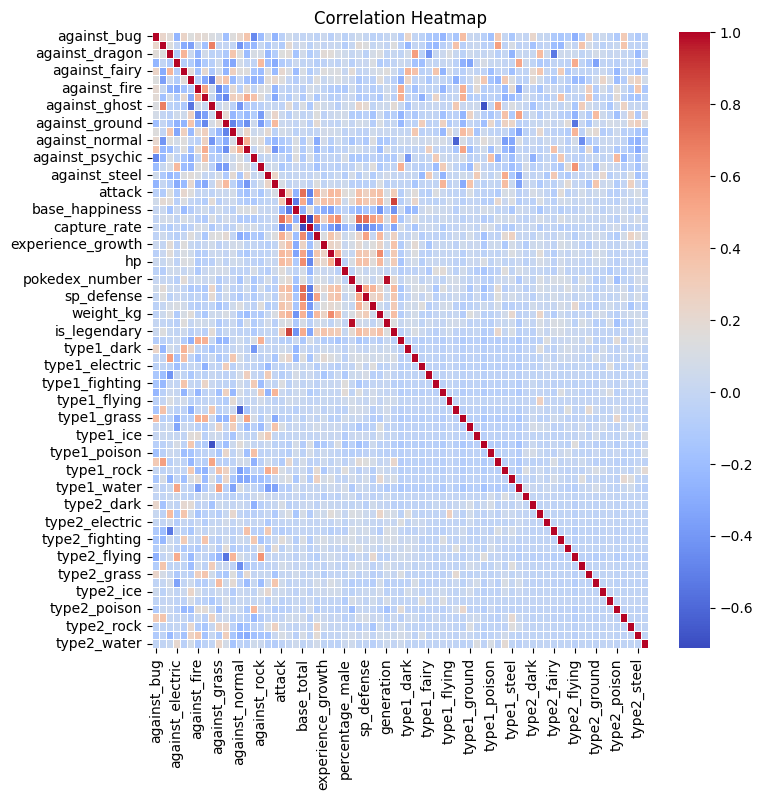

In [ ]:
correlation_matrix = df_scaled.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix,cmap='coolwarm',linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

## Feature Selection

In [ ]:
# Create correlation matrix
corr_matrix = df_scaled.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
df_scaled.drop(to_drop, axis=1, inplace=True) # generation'la çok yüksek korelasyon bulunduğu için silindi
print(to_drop)

['generation']


# Models

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=635)
# Split the data into training (70%) and temporary data (30%)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=635)

# Further split the temporary data into testing (20%) and validation (10%)
# X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.33, random_state=635)

## Decision Tree

In [ ]:
tree_classifier = DecisionTreeClassifier(random_state=635)

# Train the classifier on the training data
tree_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = tree_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       141
         1.0       1.00      0.85      0.92        20

    accuracy                           0.98       161
   macro avg       0.99      0.93      0.95       161
weighted avg       0.98      0.98      0.98       161

Confusion Matrix:
[[141   0]
 [  3  17]]


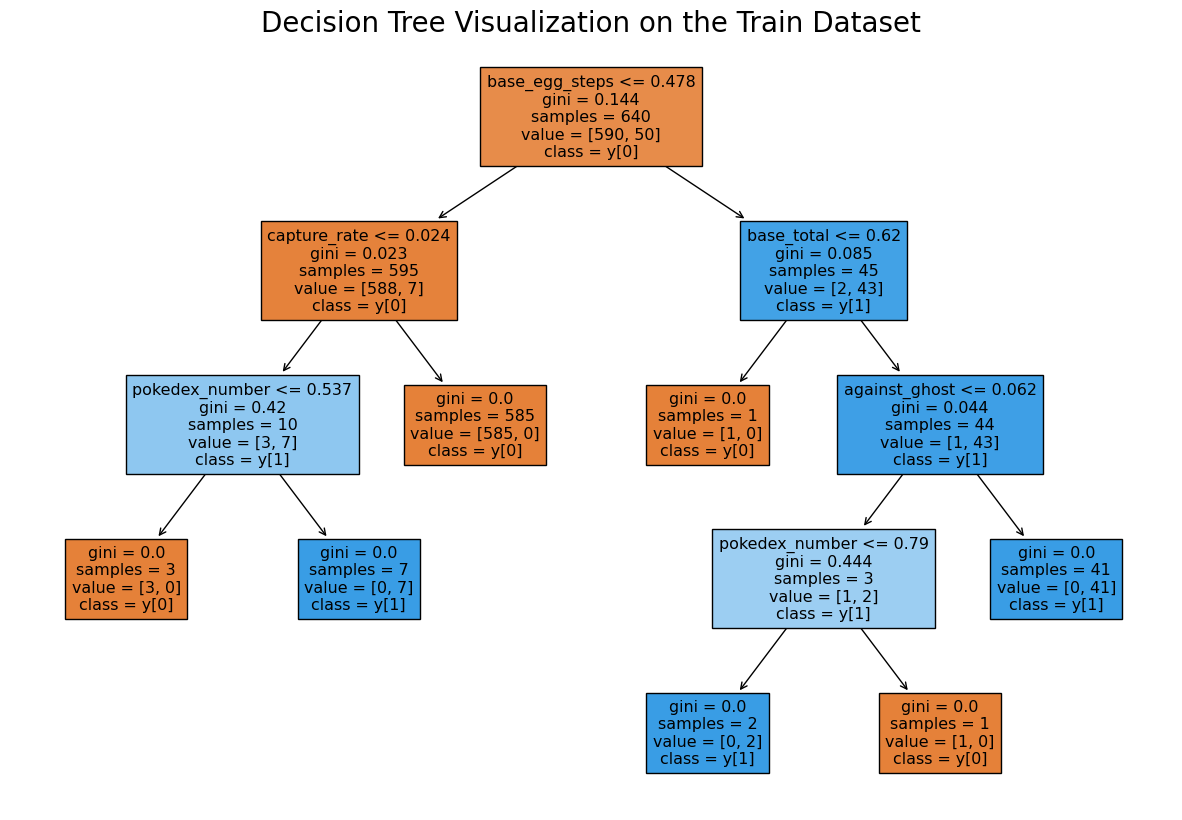

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with features (X) and target variable (y)
# Replace X and y with your actual feature matrix and target variable

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=True, rounded=False)
plt.title('Decision Tree Visualization on the Train Dataset', fontsize=20)  # Add this line for the title
plt.show()

## Random Forest

In [ ]:
# Using RandomForest Model
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
visualizerf = X.index[rf_preds.astype(int)]

#p2pred = XGB_model.predict(label_X_valid)
#preds2 = X.index[p2pred]

print(pd.crosstab(y_test, visualizerf, rownames=['Actual Legendary'], colnames=['Predicted Legendary']))

Predicted Legendary    0   1
Actual Legendary            
0.0                  141   0
1.0                    0  20


## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# defining the Bayes model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
p3pred = NB_model.predict(X_test)

preds3 = X.index[p3pred.astype(int)]

print(pd.crosstab(y_test, preds3, rownames=['Actual Legendary'], colnames=['Predicted Legendary']))

Predicted Legendary   0   1
Actual Legendary           
0.0                  78  63
1.0                   3  17


## Gradient Boosting Model

In [ ]:
XGB_model = XGBClassifier (n_estimators = 5000, learning_rate=0.1)
XGB_model.fit(X_train, y_train,
             early_stopping_rounds=10,
             eval_set=[(X_test, y_test)],
             verbose=False)

p2pred = XGB_model.predict(X_test)
preds2 = X.index[p2pred]

print(pd.crosstab(y_test, preds2, rownames=['Actual Legendary'], colnames=['Predicted Legendary']))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Predicted Legendary    0   1
Actual Legendary            
0.0                  141   0
1.0                    2  18


## Logistic Regression Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=635)


logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       141
         1.0       1.00      0.75      0.86        20

    accuracy                           0.97       161
   macro avg       0.98      0.88      0.92       161
weighted avg       0.97      0.97      0.97       161

Confusion Matrix:
[[141   0]
 [  5  15]]


## Support Vector Machine Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=635)

# Scale Features for SVM Model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create SVM model
svm_model = SVC(kernel='linear', random_state=635)

# Scale with Pipeline and combine the model
pipeline = Pipeline([('scaler', StandardScaler()), ('svm', SVC(kernel='linear', random_state=635))])

# Parameters for trying GridSearchCV
param_grid = {'svm__C': [0.0001 ,0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Train Model
grid_search.fit(X_train, y_train)

# Print Best Patameter from GridSearchCV
print("Best Parameter: ", grid_search.best_params_)

# Make predictions on the testing data
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameter:  {'svm__C': 0.01}
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       141
         1.0       1.00      1.00      1.00        20

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



## XGBoost Model

In [ ]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=635)

# Parameters for trying GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create XGBoost Model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', seed=635)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Print Best Patameter from GridSearchCV
print("Best Parameters: ", grid_search.best_params_)

# Train model with Best Parameters
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_xgb_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'subsample': 1.0}
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       141
         1.0       1.00      0.90      0.95        20

    accuracy                           0.99       161
   macro avg       0.99      0.95      0.97       161
weighted avg       0.99      0.99      0.99       161



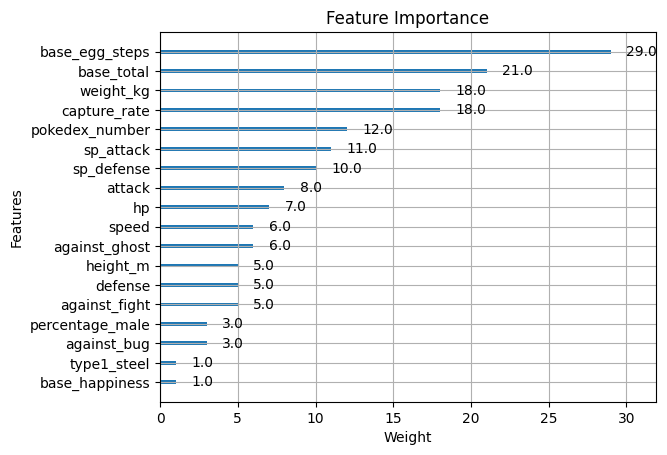

In [ ]:
from xgboost import plot_importance

# Plotting feature importance
plot_importance(best_xgb_model, importance_type='weight', title='Feature Importance', xlabel='Weight')
plt.show()


## K-Nearest Neighbors Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN Model
knn_model = KNeighborsClassifier()

# Parameters for trying GridSearchCV
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}  # Farklı n_neighbors değerlerini deneyebilirsiniz

# Create GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Print Best Patameter from GridSearchCV
print("Best Parameter: ", grid_search.best_params_)

# Train model with Best Parameter
best_knn_model = grid_search.best_estimator_
best_knn_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_knn_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))